For a square plate of edge length “l=1m”, simulate the steady state temperature contours for the following boundary values:
- Temperature at three edges is held constant (100 degree Celsius at the top edge, 50 degree celsius at the bottom edge, and 0 degree celsius at the right edge)
- The left edge is perfectly insulating, i.e. there is no heat flux. (This is to say that the derivative of the temperature wrt the horizontal direction is 0 at the left edge)


## Heat Equation

In this module, we’ll aim at solving the Laplace equation using a numerical approach (discretization) rather than analytical approach, thereby transforming the continuous form of the calculus into the discrete form of matrix algebra. We’ll solve the heat equation using Euler Method and Finite Difference Method and implement these in Python.

Let's get started!

## Introduction ##

By the second law of thermodynamics, loosely stated, heat will flow from hotter bodies to adjacent cooler bodies, in proportion to the difference of the temperature and the thermal conductivity of the material between them. In physics and mathematics, the heat equation is a partial differential equation that describes how the distribution of heat evolves over time in a solid medium.

The following is the heat equation in one dimension:
$$ \frac{\partial T}{\partial t}(x,t) = \alpha \frac{\partial^2 T}{\partial x^2} $$

where $\alpha$ is the thermal diffusity of the medium and can be calculated using material properties as follows:
$$ \alpha = \frac{k}{\rho c_p} $$

where $k$ is thermal conductivity, $c_p$ is specific heat capacity and $\rho$ is density.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

Initialize the important variables:

In [2]:
# Set maximum number of iterations
maxIter = 10000

# Set Dimension and delta
lenX = lenY = 101 
delta = 1

# Boundary conditions
Ttop = 100
Tbottom = 50
#Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 50

*Set the "plot window" and meshgrid.* <br>
[np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) creates the mesh grid (we'll use this to plot the solution), the first parameter is for the x-dimension, and the second parameter is for the y-dimension.  <br>
We use `np.arange(..., ...)` to arrange a 1-D array with element value that starts from some value to some value, in our case, it's from $0$ to $lenX$ and from $0$ to $lenY$. (Recall how we used this method for solving 1D Heat Equation as well!) <br>
The color-interpolation attribute specifies the color space for gradient interpolations. You can find various colormaps in matplotlib [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [3]:
# Set colour interpolation and colour map
colorinterpolation = 100
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenY), np.arange(0, lenX))

*Apply the boundary conditions.* <br>
Now we'll set the region: we define 2-D array, define the size and fill the array with guess value. Then we set the boundary conditions.

In [4]:
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[:, (lenX-1):] = Tright
#T[:, :1] = Tleft
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom

*Iterate using the discretized Laplace equation in 2-D* <br>
Now we are ready to apply our final equation. We iterate the equation using `for` loop.

In [5]:
# Iteration (We assume that the iteration converges in maxIter = 10000)
print("Iterating!")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
        T[i,0] = 0.25 * (T[i+1][0] + T[i-1][0] + T[i][1] + T[i][1]) # symmetric finite difference approximation to the derivative T[i][j-1] = T[i][j+1]  # Here j = 0

print("Iteration finished.")

Iterating!
Iteration finished.


*Plot the contours.* <br>
Well, the main logic is finished. Next, we write code to plot the solution, using Matplotlib.

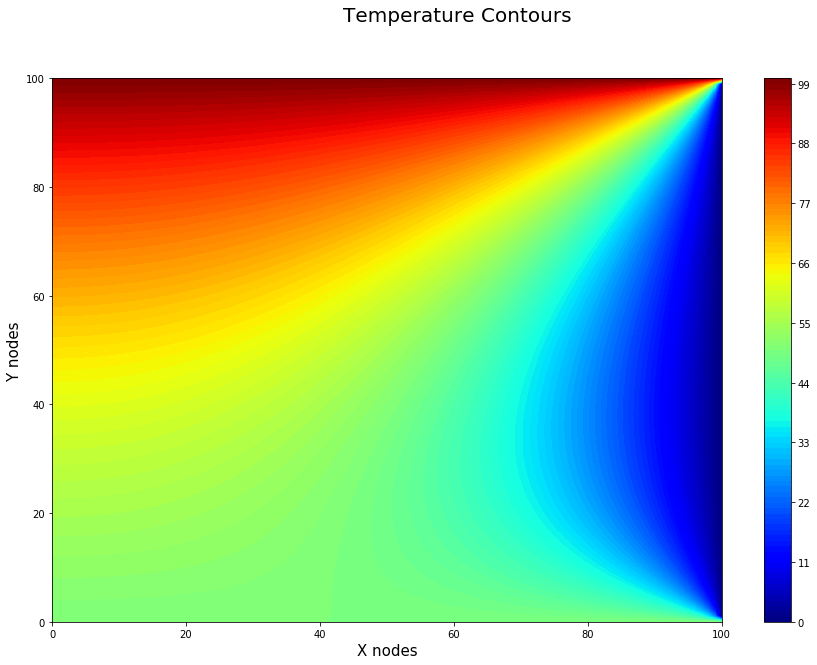

In [6]:
# Configure the contour
plt.figure(figsize=[15, 10])
plt.suptitle("Temperature Contours", fontsize=20)
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.xlabel("X nodes", fontsize=15)
plt.ylabel("Y nodes", fontsize=15)
plt.savefig("Q2.svg")
# Set Colorbar
plt.colorbar()